# Visualization of RSMs

Lets compare the RSMs
- between the 2 methods (cosine similarity vs spearman)
- between ROIs
- between subjects

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Set the base directory
base_dir = '/home/hmueller2/ibc_code/'

# Define the paths to the RSMs
rsm_spearman_path = os.path.join(base_dir, 'ibc_output_RSA_spearman')
rsm_cosine_path = os.path.join(base_dir, 'ibc_output_RSA_cosine')

# Print the paths to verify
print(f"Spearman RSM path: {rsm_spearman_path}")
print(f"Cosine RSM path: {rsm_cosine_path}")

Spearman RSM path: /home/hmueller2/ibc_code/ibc_output_RSA_spearman
Cosine RSM path: /home/hmueller2/ibc_code/ibc_output_RSA_cosine


In [3]:
# DEFINITIONS
subject = 'sub-02'
parcel = 'random' # choose specific or 'random'
method = 'cosine' # choose 'cosine' or 'spearman'

if parcel == "random":
    # List all files in the spearman RSM path for the subject
    if method == 'cosine':
        files = os.listdir(os.path.join(rsm_cosine_path, subject))
    elif method == 'spearman':
        files = os.listdir(os.path.join(rsm_spearman_path, subject))
    # Filter files to only include CSV files
    csv_files = [f for f in files if f.endswith('.csv')]
    # Select a random file
    selected_file = np.random.choice(csv_files)
    parcel = '_'.join(selected_file.split('_')[1:3])
else:
    parcel = parcel

# Print chosen ones
print(f"Selected subject: {subject}")
print(f"Selected parcel: {parcel}")
print(f"Selected method: {method}")

Selected subject: sub-02
Selected parcel: R_p10p
Selected method: cosine


## 1. Cosine vs Spearman

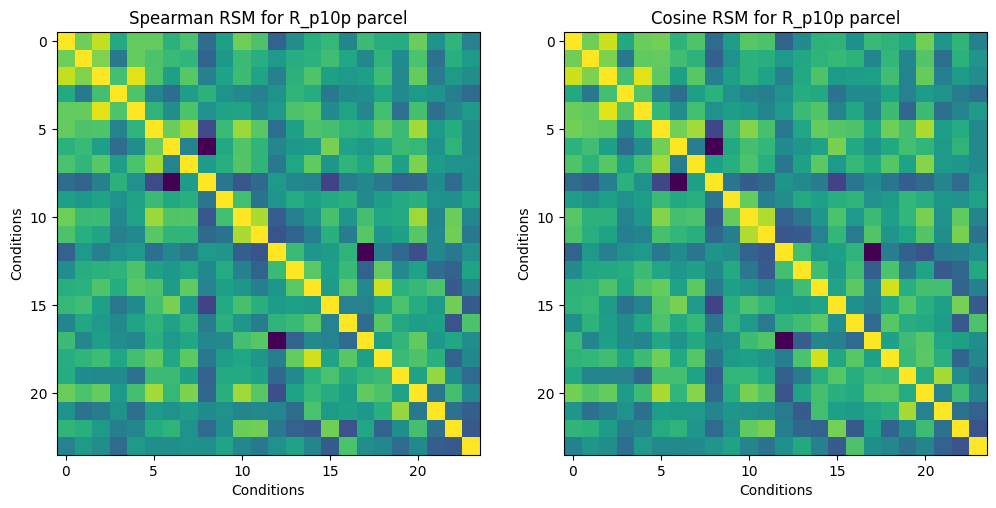

In [4]:
# Load the RSMs for the subject and parcel
rsm_spearman = np.loadtxt(os.path.join(rsm_spearman_path, subject, f'rsm_{parcel}_ROI_{subject}_all-contrasts_method-spearman.csv'), delimiter=',')
rsm_cosine = np.loadtxt(os.path.join(rsm_cosine_path, subject, f'rsm_{parcel}_ROI_{subject}_all-contrasts_method-cosine.csv'), delimiter=',')

# Plot the RSMs for comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(rsm_spearman, cmap='viridis')
axes[0].set_title(f'Spearman RSM for {parcel} parcel')
axes[0].set_xlabel('Conditions')
axes[0].set_ylabel('Conditions')

axes[1].imshow(rsm_cosine, cmap='viridis')
axes[1].set_title(f'Cosine RSM for {parcel} parcel')
axes[1].set_xlabel('Conditions')
axes[1].set_ylabel('Conditions')

plt.show()

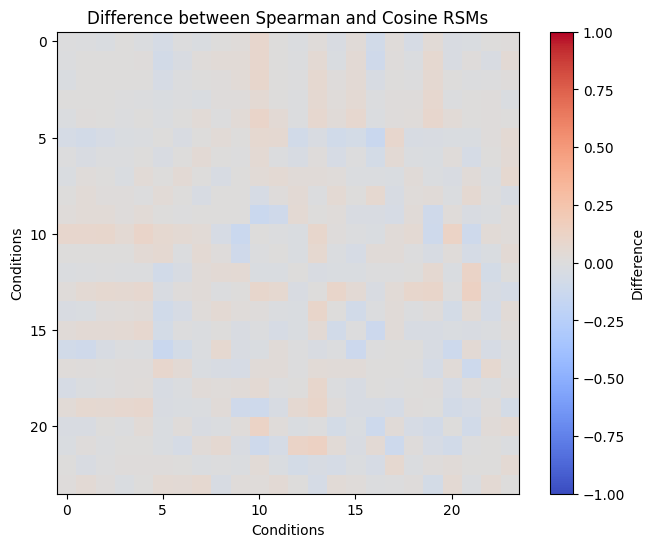

Maximum difference between the matrices: 0.13828430711639977


In [5]:
# Calculate the difference between the two matrices
difference_matrix = rsm_spearman - rsm_cosine

# Plot the difference matrix
plt.figure(figsize=(8, 6))
plt.imshow(difference_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Difference')
plt.title('Difference between Spearman and Cosine RSMs')
plt.xlabel('Conditions')
plt.ylabel('Conditions')
plt.show()

# Print the maximum difference
max_difference = np.max(np.abs(difference_matrix))
print(f"Maximum difference between the matrices: {max_difference}")

## 2. ROI vs ROI

Text(0, 0.5, 'Conditions')

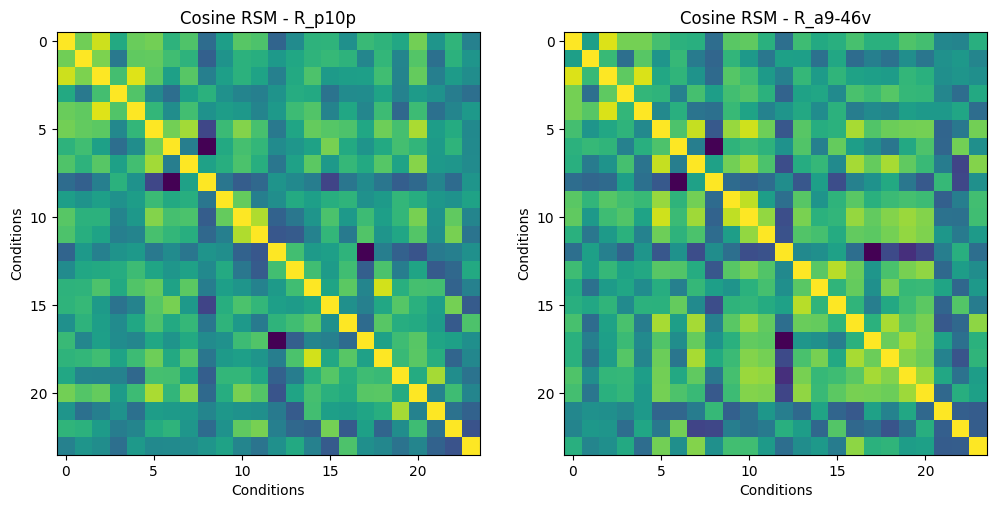

In [6]:
# Define the method to use for the comparison
method = 'cosine'

# Define the parcel to compare
parcel_compare = 'random' # choose specific or 'random'
if parcel_compare == "random":
    # List all files in the spearman RSM path for the subject
    if method == 'cosine':
        files = os.listdir(os.path.join(rsm_cosine_path, subject))
    elif method == 'spearman':
        files = os.listdir(os.path.join(rsm_spearman_path, subject))
    # Filter files to only include CSV files
    csv_files = [f for f in files if f.endswith('.csv')]
    # Select a random file
    selected_file = np.random.choice(csv_files)
    parcel_compare = '_'.join(selected_file.split('_')[1:3])
else:
    parcel_compare = parcel_compare

# Load the RSMs for the subject and parcel_compare
rsm_compare = np.loadtxt(os.path.join(eval(f'rsm_{method}_path'), subject, f'rsm_{parcel_compare}_ROI_{subject}_all-contrasts_method-{method}.csv'), delimiter=',')

# Plot the RSMs for comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(rsm_cosine if method == 'cosine' else rsm_spearman, cmap='viridis')
axes[0].set_title(f'Cosine RSM - {parcel}')
axes[0].set_xlabel('Conditions')
axes[0].set_ylabel('Conditions')

axes[1].imshow(rsm_compare, cmap='viridis')
axes[1].set_title(f'Cosine RSM - {parcel_compare}')
axes[1].set_xlabel('Conditions')
axes[1].set_ylabel('Conditions')

## 3. Subject vs Subject

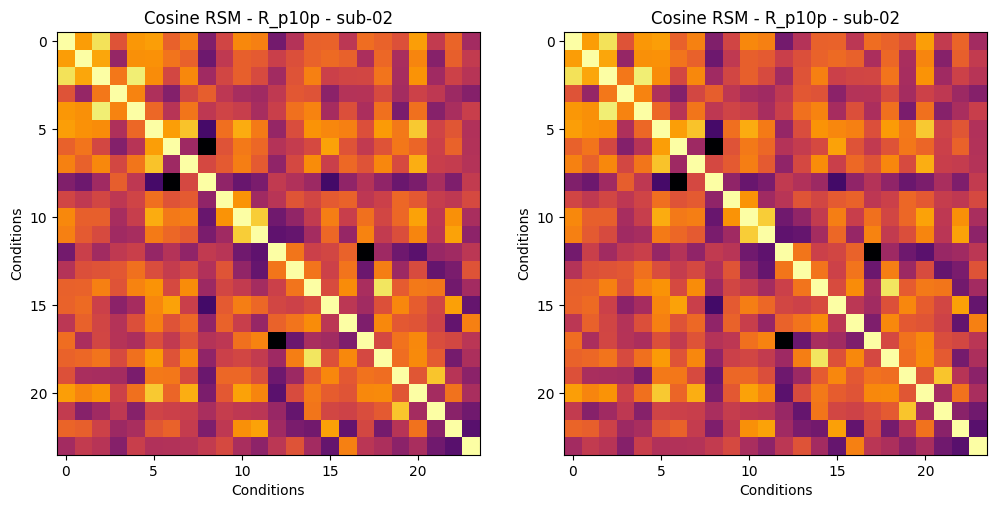

In [7]:
# Define the subjects to compare
subjects = [subject, 'sub-02']  # Add more subjects as needed

# Load the RSMs for each subject
rsms = []
for subj in subjects:
    rsm_path = os.path.join(eval(f'rsm_{method}_path'), subj, f'rsm_{parcel}_ROI_{subj}_all-contrasts_method-{method}.csv')
    rsms.append(np.loadtxt(rsm_path, delimiter=','))

# Plot the RSMs for comparison
fig, axes = plt.subplots(1, len(subjects), figsize=(12, 6))
for i, (rsm, subj) in enumerate(zip(rsms, subjects)):
    axes[i].imshow(rsm, cmap='inferno') # I like 'inferno', 'magma' and 'viridis'
    axes[i].set_title(f'{method.capitalize()} RSM - {parcel} - {subj}')
    axes[i].set_xlabel('Conditions')
    axes[i].set_ylabel('Conditions')

plt.show()

## 4. RA

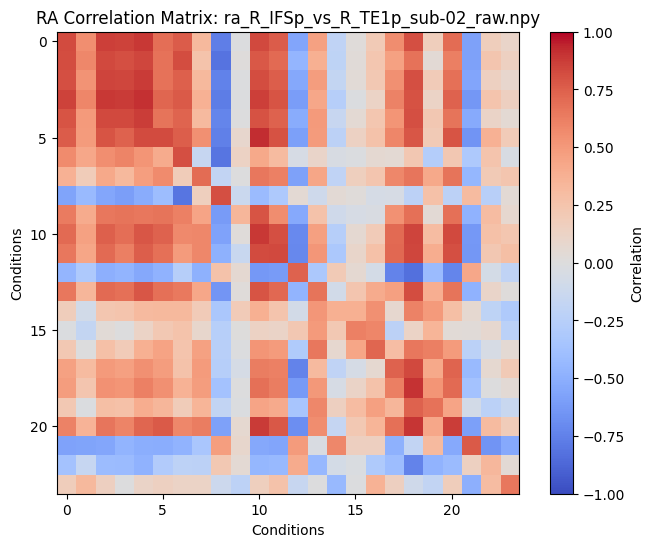

In [8]:
# Define the path to the RA directory
use_thresholded = False  # Set to False if you want to use raw data

ra_dir_path = os.path.join(base_dir, 'ibc_output_RA_npy', 'thresholded' if use_thresholded else 'raw', subject)

# List all files in the RA directory
ra_files = os.listdir(ra_dir_path)

# Filter files to only include NPY files
ra_npy_files = [f for f in ra_files if f.endswith('.npy')]

# Select a random file
ra_selected_file = np.random.choice(ra_npy_files)

# Define the path to the selected RA file
ra_file_path = os.path.join(ra_dir_path, ra_selected_file)

# Check if the file exists
if not os.path.exists(ra_file_path):
    raise FileNotFoundError(f"{ra_file_path} not found. Please check the file name and path.")

# Load the RA data
ra_data = np.load(ra_file_path)

# Plot the RA data as a correlation matrix
plt.figure(figsize=(8, 6))
plt.imshow(ra_data, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.title(f'RA Correlation Matrix: {ra_selected_file}')
plt.xlabel('Conditions')
plt.ylabel('Conditions')
plt.show()

## 5. Topographic alignment

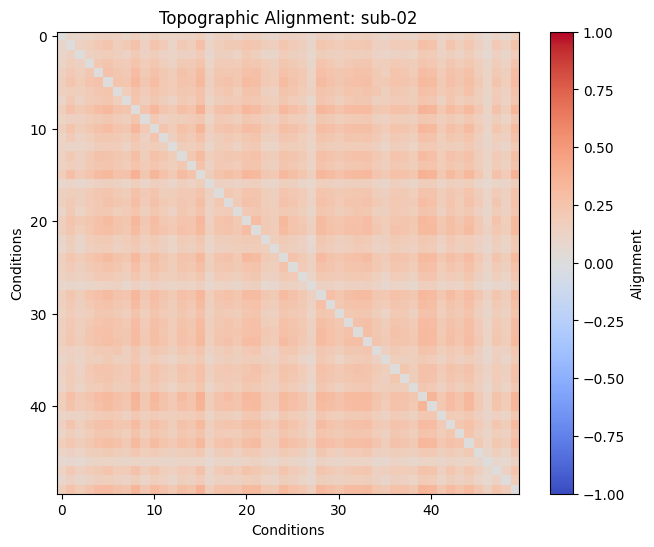

In [11]:
# Define the path to the topographic alignment file for the subject
topographic_alignment_path = os.path.join(base_dir, 'ibc_output_RA_npy', 'topographic_alignment', f'topographic_alignment_{subject}.npy')

# Check if the file exists
if not os.path.exists(topographic_alignment_path):
    raise FileNotFoundError(f"{topographic_alignment_path} not found. Please check the file name and path.")

# Load the topographic alignment data
topographic_alignment_data = np.load(topographic_alignment_path)

# Plot the topographic alignment data
plt.figure(figsize=(8, 6))
plt.imshow(topographic_alignment_data, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Alignment')
plt.title(f'Topographic Alignment: {subject}')
plt.xlabel('Conditions')
plt.ylabel('Conditions')
plt.show()